In [ ]:
%pip install -r ./evaluation/eval_requirements.txt

In [11]:
# Perform an NER evaluation for the LLM Textmarker

In [12]:
from datasets import load_dataset

# dataset used
data_path = 'MichaelAI23/English_CVs'

data = load_dataset(data_path)
data["train"]

train_val = data["train"].train_test_split(
    test_size=100, shuffle=True, seed=42
)
train_data = train_val["train"]
val_data = train_val["test"]

labels = val_data["output"]

In [14]:
import json
with open(f"textmarker_predictions.json", "r", encoding="utf-8") as fp:
    predictions = json.load(fp)["model_preds"]

predictions = list(predictions.values())
predictions = [pred[0]["generated_text"] for pred in predictions]

In [15]:
labels[:10]

["{'pe': {'s': 'Michael', 'e': ' hotel.'}, 'ed': {'s': '', 'e': ''}, 'wo': {'s': 'As', 'e': ' efficiency.'}, 'sk': {'s': 'Experienced', 'e': ' growth.'}}",
 "{'pe': {'s': 'Caleb', 'e': ' style.'}, 'ed': {'s': '- Bachelor', 'e': ', 2008'}, 'wo': {'s': '1. As', 'e': ' 2022.'}, 'sk': {'s': 'Experienced', 'e': ' lifecycle.'}}",
 "{'pe': {'s': '', 'e': ''}, 'ed': {'s': 'A', 'e': ' completed.'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' retention.'}}",
 "{'pe': {'s': 'Grace', 'e': ' in Los Cabos.'}, 'ed': {'s': 'A', 'e': ' completed.'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' precision.'}}",
 "{'pe': {'s': 'Jose', 'e': '-9876543210.'}, 'ed': {'s': '- Bachelor', 'e': ', 2020'}, 'wo': {'s': 'Solution Architect', 'e': ' projects'}, 'sk': {'s': '- Proficient', 'e': ' success.'}}",
 "{'pe': {'s': '- Mail', 'e': '/gracerocha'}, 'ed': {'s': '- Master', 'e': ', 2009'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' organizations.'}}",
 "{'pe': {'

In [16]:
predictions[:10]

["{'pe': {'s': 'Michael', 'e': ' hotel.'}, 'ed': {'s': '', 'e': ''}, 'wo': {'s': 'As', 'e': ' efficiency.'}, 'sk': {'s': 'Experienced', 'e': ' growth.'}}",
 "{'pe': {'s': 'Caleb', 'e': ' style.'}, 'ed': {'s': '- Bachelor', 'e': ', 2008'}, 'wo': {'s': '1. As', 'e': ' 2022.'}, 'sk': {'s': 'Experienced', 'e': ' lifecycle.'}}",
 "{'pe': {'s': '', 'e': ''}, 'ed': {'s': 'A', 'e': ' completed.'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' retention.'}}",
 "{'pe': {'s': 'Grace', 'e': ' in Los Cabos.'}, 'ed': {'s': 'A', 'e': ' completed.'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' precision.'}}",
 "{'pe': {'s': 'Jose', 'e': '-9876543210.'}, 'ed': {'s': '- Bachelor', 'e': ', 2020'}, 'wo': {'s': 'Solution', 'e': ' projects'}, 'sk': {'s': '- Proficient', 'e': ' success.'}}",
 "{'pe': {'s': '- Mail', 'e': '/gracerocha'}, 'ed': {'s': '- Master', 'e': ', 2009'}, 'wo': {'s': '', 'e': ''}, 'sk': {'s': '- Proficient', 'e': ' organizations.'}}",
 "{'pe': {'s': '', 'e

In [27]:
from evaluation.utils import compute_sequences

In [ ]:
import argilla as rg
import json
import re
import os
from dotenv import load_dotenv
load_dotenv()
api_url = os.getenv("ARGILLA_API_URL")

rg.init(
    api_url=api_url,
    api_key=os.getenv("ARGILLA_API_KEY"),
    workspace="admin"
)

# Load the dataset
dataset = rg.load(name="llm_textmarker_with_preds", workspace="admin")

In [ ]:
dataset[0].text

In [ ]:
import evaluate
# Use the seqeval metric and compute the confusion matrix afterwards (locally and globally)
seqeval = evaluate.load('seqeval')

In [55]:
references, predictions,  prediction_triples, label_triples = compute_sequences(dataset)

In [60]:
filtered_txts = [dataset[idx].text for idx, (ref, pred) in enumerate(zip(references, predictions)) if ref != pred]

In [61]:
len(filtered_txts)

5

In [62]:
filtered_txts

["I am a Business Analyst who enjoys rock climbing in my free time, challenging myself to reach new heights. Additionally, I have a passion for photography, capturing moments and scenes that inspire me creatively.\nBusiness Analyst, 2019 - Present at XYZ Corporation\n- Conducted market research and data analysis to identify key trends and opportunities for business growth.\n- Collaborated with cross-functional teams to develop and implement strategies that improved operational efficiency and customer satisfaction.\n\nIntern Business Analyst, Summer 2018 at ABC Consulting Firm\n- Assisted senior analysts in gathering and analyzing data to support client projects and recommendations.\n- Prepared reports and presentations for clients, summarizing findings and providing actionable insights for decision-making.\nThe individual began publishing academic research in the field of business analysis in 2019, contributing valuable insights and knowledge to the scholarly community. Their publicati

In [40]:
len(references[12])

230

In [41]:
len(predictions[12])

230

In [63]:
results = seqeval.compute(predictions=predictions, references=references)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ed seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: pe seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: sk seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: none seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: wo seems not to be NE tag.
  warnings.wa

In [64]:
results

{'d': {'precision': 0.9868421052631579,
  'recall': 0.9868421052631579,
  'f1': 0.9868421052631579,
  'number': 76},
 'e': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 86},
 'k': {'precision': 1.0,
  'recall': 0.989247311827957,
  'f1': 0.9945945945945946,
  'number': 93},
 'o': {'precision': 0.9605263157894737,
  'recall': 0.9605263157894737,
  'f1': 0.9605263157894737,
  'number': 76},
 'one': {'precision': 0.9661016949152542,
  'recall': 0.9743589743589743,
  'f1': 0.9702127659574468,
  'number': 117},
 'overall_precision': 0.9821428571428571,
 'overall_recall': 0.9821428571428571,
 'overall_f1': 0.9821428571428571,
 'overall_accuracy': 0.9906907819743141}

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
reference_list = [ref for lab in references for ref in lab]
prediction_list = [pred for sample in predictions for pred in sample]



z = confusion_matrix(reference_list, prediction_list, labels=["pe", "wo", "sk", "ed", "none"])
print(z)

[[2693    0    0    0    0]
 [   0 6136    0    0   60]
 [   0    0 5265    0   62]
 [   0   19    0 2035    0]
 [   0  104    0    0 9944]]


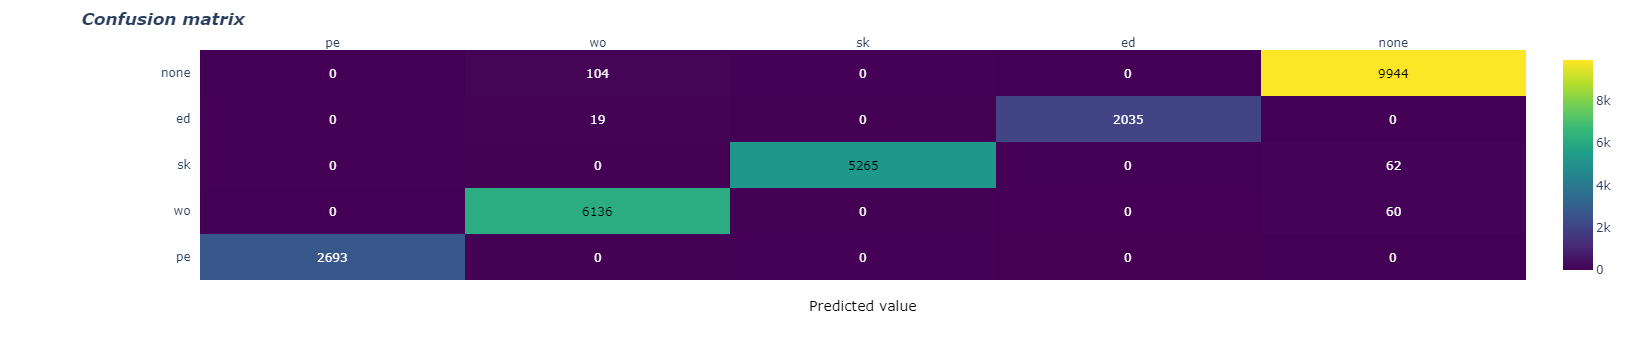

In [100]:
import plotly.express as px
x = ["pe", "wo", "sk", "ed", "none"]
y =  ["pe", "wo", "sk", "ed", "none"]

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis') #, autorange="reversed")
# fig = px.imshow(z) # x=x, y=y, annotation_text=z_text, colorscale='Viridis') #, autorange="reversed")


# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# Adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()